In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [23]:
df=pd.read_csv("train.csv")

In [24]:
df.columns

Index(['category', 'sub_category', 'crimeaditionalinfo'], dtype='object')

In [25]:
le1=LabelEncoder()
le2=LabelEncoder()

In [26]:
df["category"]=le1.fit_transform(df["category"])

In [27]:
df["sub_category"]=le2.fit_transform(df["sub_category"])

In [28]:
df_cat=df[["category","crimeaditionalinfo"]]

In [29]:
df_cat

category                                 crimeaditionalinfo
0             9  I had continue received random calls and abusi...
1             7  The above fraudster is continuously messaging ...
2             8  He is acting like a police and demanding for m...
3             9  In apna Job I have applied for job interview f...
4             7  I received a call from lady stating that she w...
...         ...                                                ...
93681         7  Identity theft   Smishing SMS Fraud  CreditDeb...
93682         7  RECEIVED CALL FROM  NUMBER ASKING ABOUT phone ...
93683         7  Cyber Stalking   Blackmailing   PhoneSMSVOIP C...
93684         9  Call karke bola ki aapka lotary laga ha aru AC...
93685         7  There is app name koko loan app they send the ...

[93686 rows x 2 columns]

In [30]:
!pip install wordcloud


In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import math

## MOST FREQUENT WORDS IN EACH CATEGORY

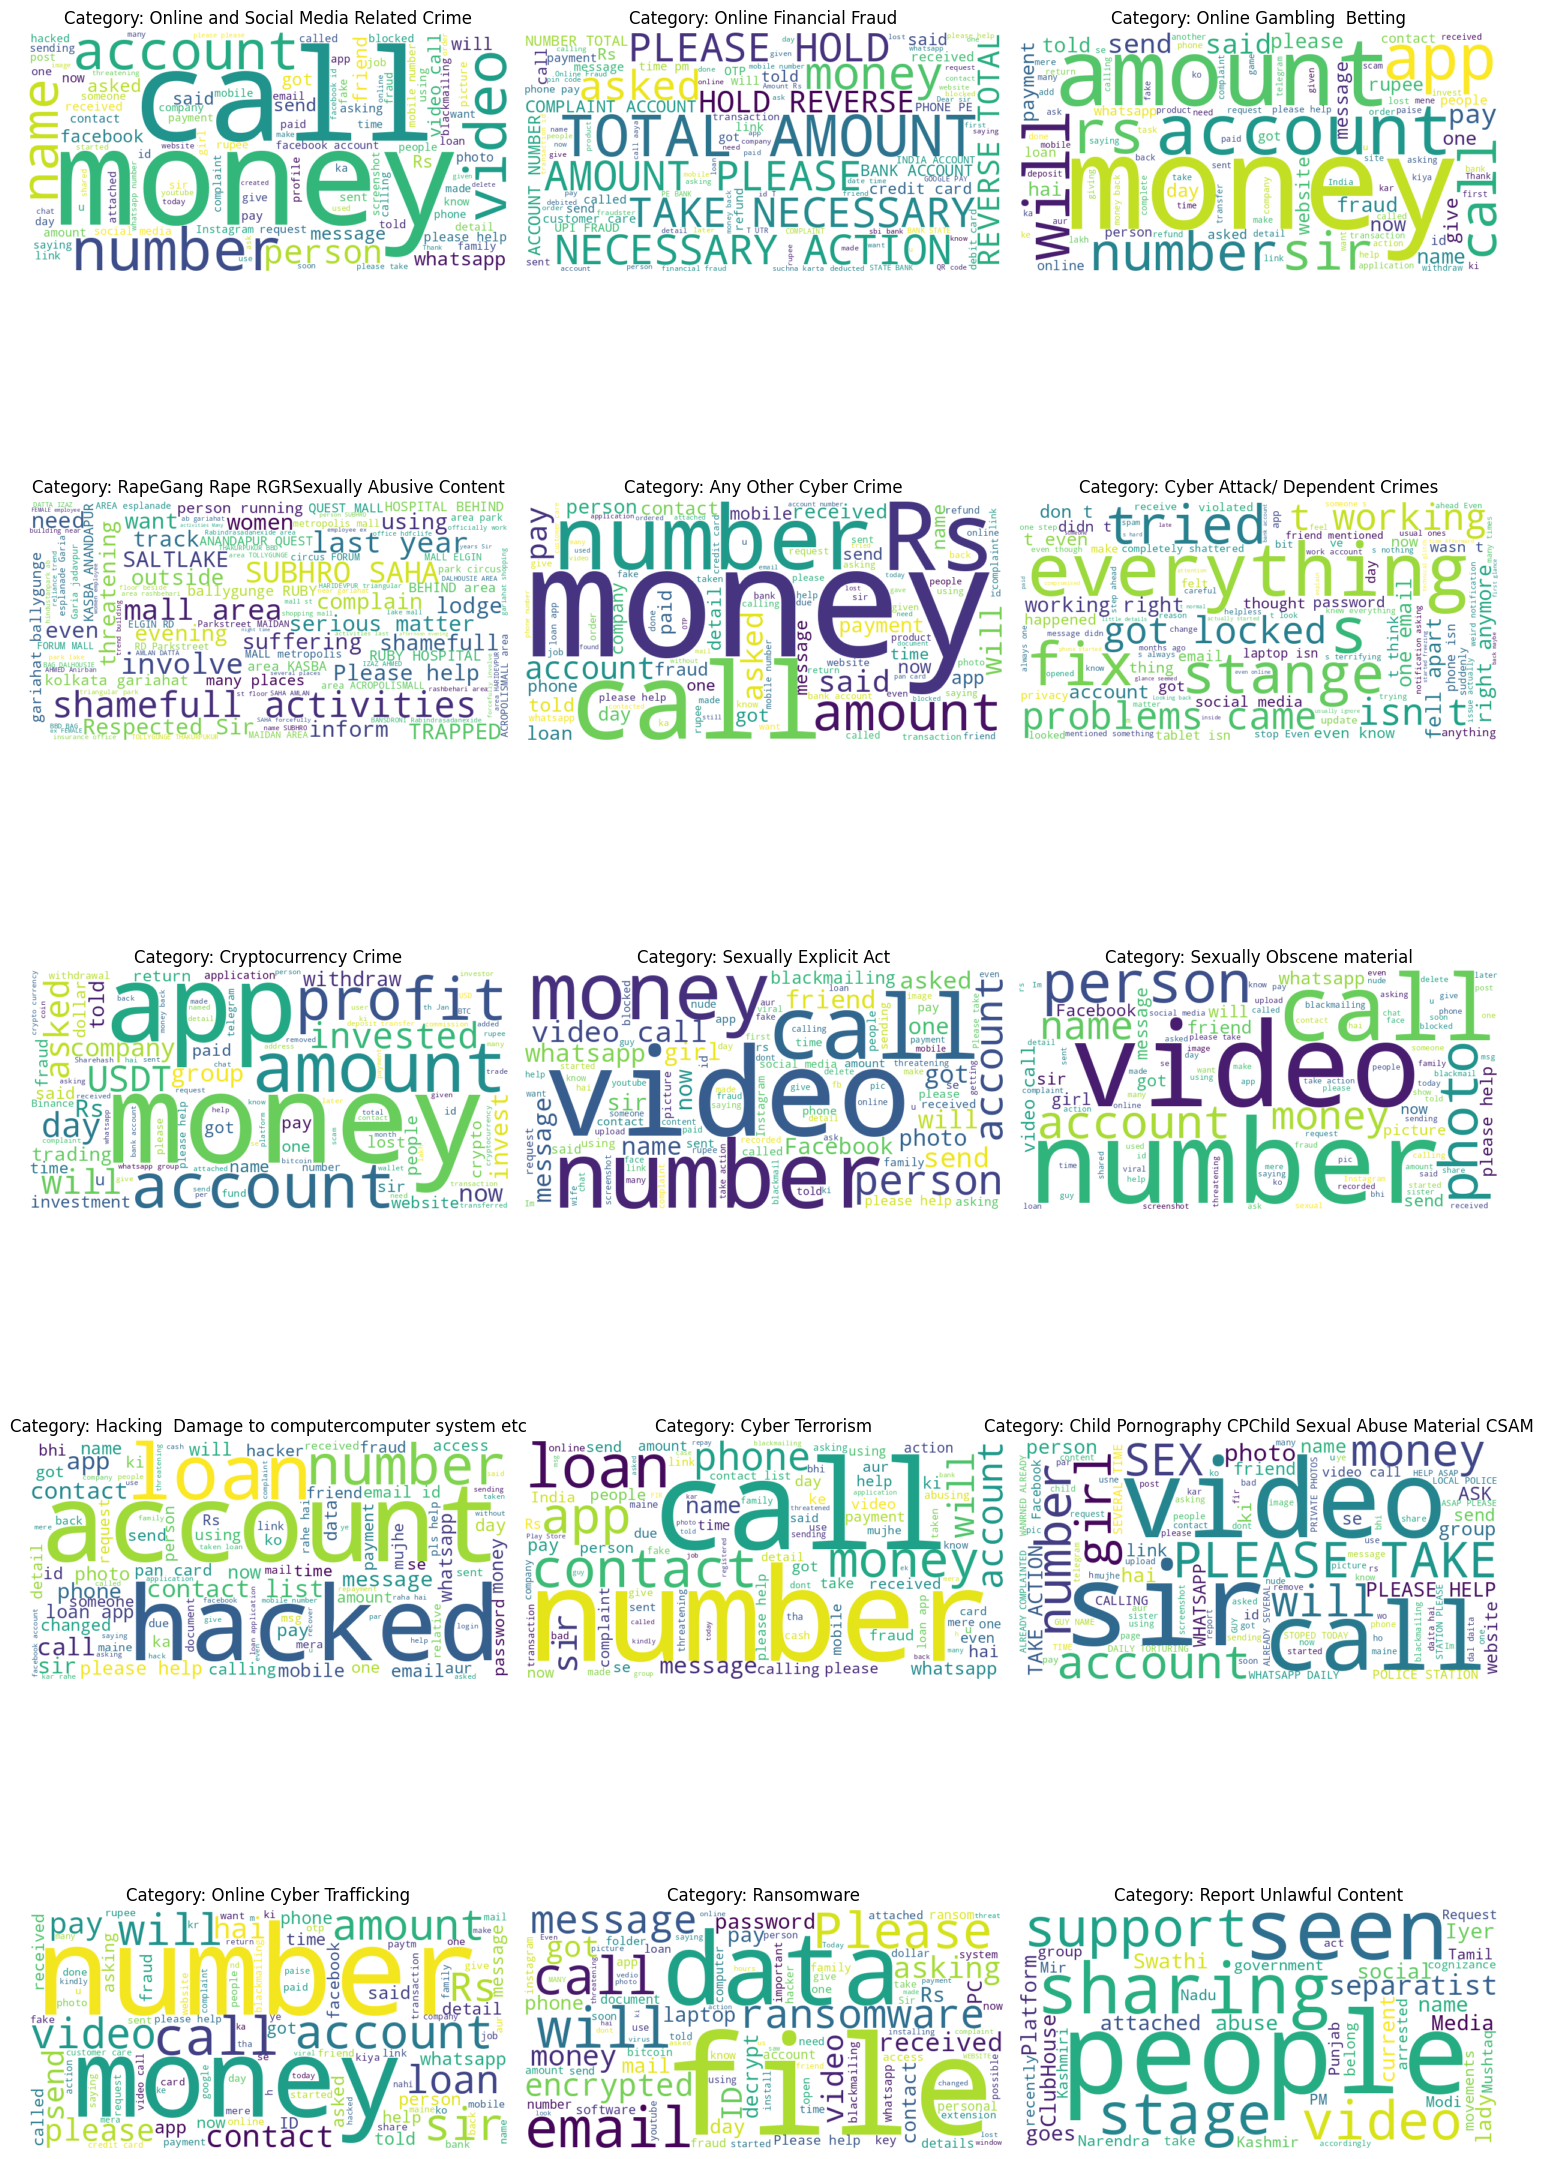

In [32]:
categories = df_cat['category'].unique()
num_categories = len(categories)

# Calculate the grid size based on the number of categories
cols = 3  # Set the number of columns you want
rows = math.ceil(num_categories / cols)

# Set up the plot grid for displaying each word cloud separately
plt.figure(figsize=(15, rows * 5))
for i, category in enumerate(categories, 1):
    # Get the original category name using inverse_transform
    original_category_name = le1.inverse_transform([category])[0]
    
    # Filter text data for the current category and handle NaN values
    text = " ".join(df[df['category'] == category]['crimeaditionalinfo'].fillna("").values)
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)
    
    # Plotting each word cloud
    plt.subplot(rows, cols, i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Category: {original_category_name}")

plt.tight_layout()
plt.show()

In [44]:
encode=df["category"].unique()
print(le1.inverse_transform(encode))
cat_labels=dict(zip(encode,le1.inverse_transform(encode)))

['Online and Social Media Related Crime' 'Online Financial Fraud'
 'Online Gambling  Betting' 'RapeGang Rape RGRSexually Abusive Content'
 'Any Other Cyber Crime' 'Cyber Attack/ Dependent Crimes'
 'Cryptocurrency Crime' 'Sexually Explicit Act'
 'Sexually Obscene material'
 'Hacking  Damage to computercomputer system etc' 'Cyber Terrorism'
 'Child Pornography CPChild Sexual Abuse Material CSAM'
 'Online Cyber Trafficking' 'Ransomware' 'Report Unlawful Content']


In [45]:
cat_labels

{9: 'Online and Social Media Related Crime',
 7: 'Online Financial Fraud',
 8: 'Online Gambling  Betting',
 11: 'RapeGang Rape RGRSexually Abusive Content',
 0: 'Any Other Cyber Crime',
 3: 'Cyber Attack/ Dependent Crimes',
 2: 'Cryptocurrency Crime',
 13: 'Sexually Explicit Act',
 14: 'Sexually Obscene material',
 5: 'Hacking  Damage to computercomputer system etc',
 4: 'Cyber Terrorism',
 1: 'Child Pornography CPChild Sexual Abuse Material CSAM',
 6: 'Online Cyber Trafficking',
 10: 'Ransomware',
 12: 'Report Unlawful Content'}

## MOST FREQUENT WORDS IN EACH SUBCATEGORY

In [37]:
df_cat=df[["sub_category","crimeaditionalinfo"]]

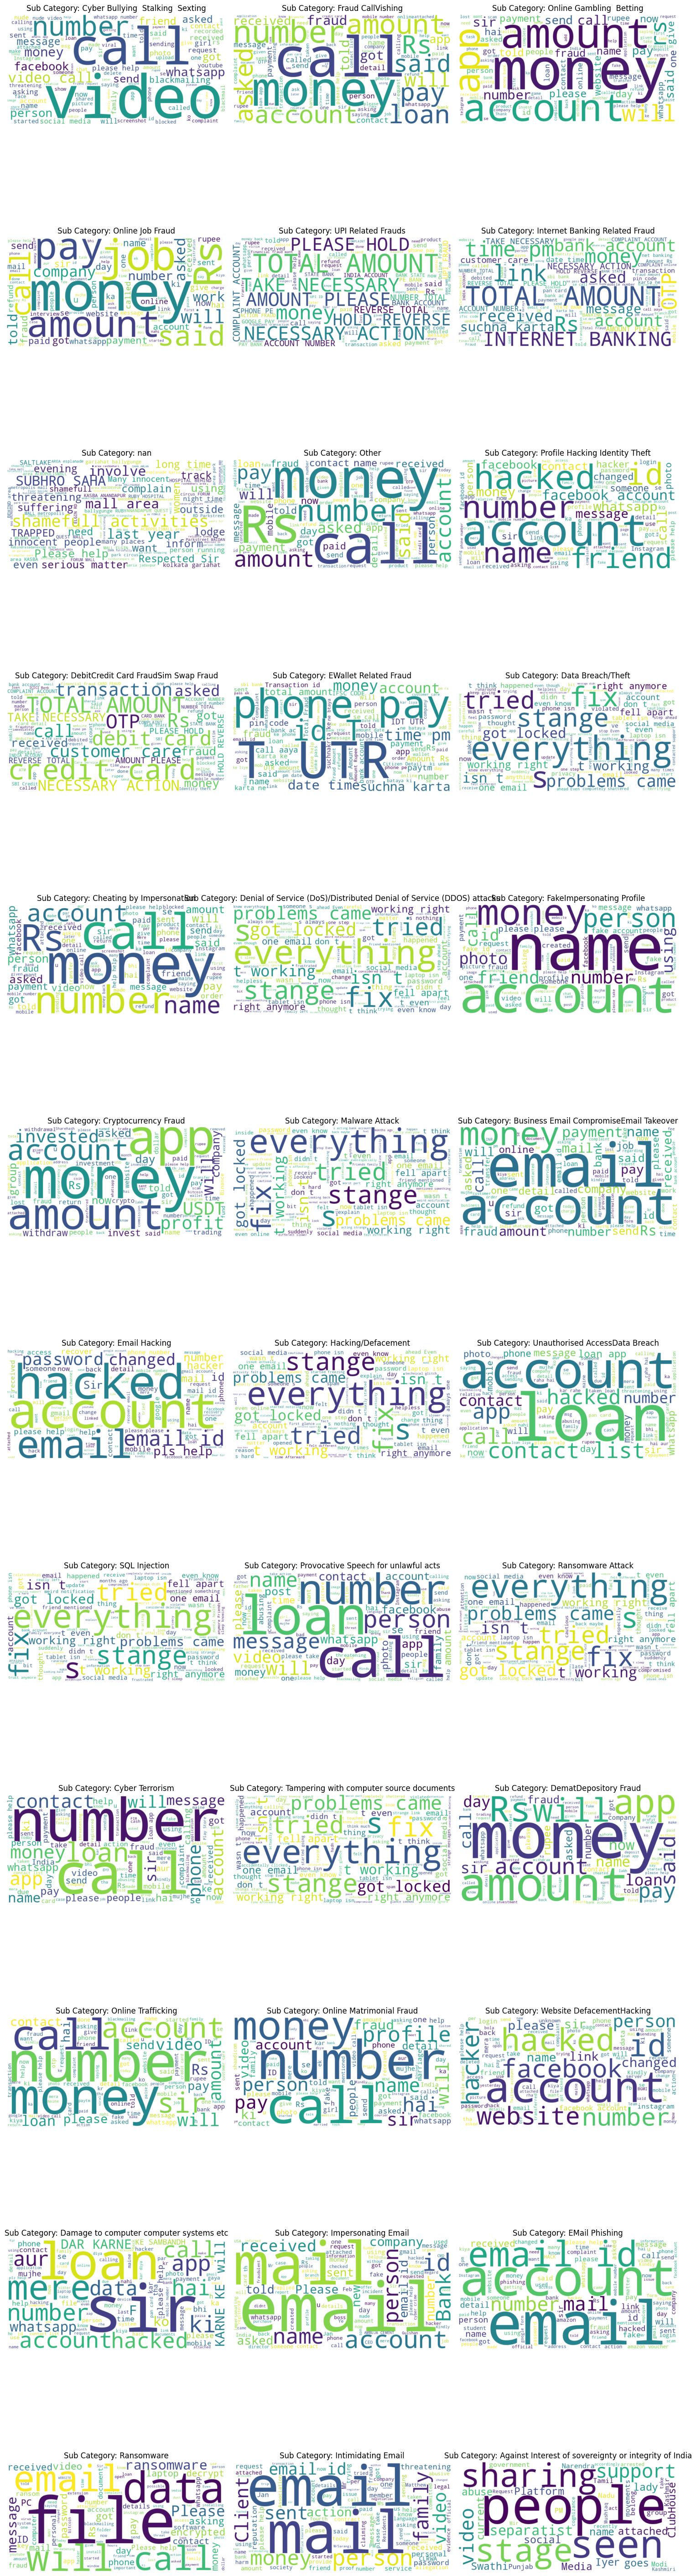

In [40]:
categories = df_cat['sub_category'].unique()
num_categories = len(categories)

# Calculate the grid size based on the number of categories
cols = 3  # Set the number of columns you want
rows = math.ceil(num_categories / cols)

# Set up the plot grid for displaying each word cloud separately
plt.figure(figsize=(15, rows * 5))
for i, category in enumerate(categories, 1):
    # Get the original category name using inverse_transform
    original_category_name = le2.inverse_transform([category])[0]
    
    # Filter text data for the current category and handle NaN values
    text = " ".join(df[df['sub_category'] == category]['crimeaditionalinfo'].fillna("").values)
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)
    
    # Plotting each word cloud
    plt.subplot(rows, cols, i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Sub Category: {original_category_name}")

plt.tight_layout()
plt.show()

In [46]:
encode=df["sub_category"].unique()
print(le2.inverse_transform(encode))
subcat_labels=dict(zip(encode,le2.inverse_transform(encode)))

['Cyber Bullying  Stalking  Sexting' 'Fraud CallVishing'
 'Online Gambling  Betting' 'Online Job Fraud' 'UPI Related Frauds'
 'Internet Banking Related Fraud' nan 'Other'
 'Profile Hacking Identity Theft' 'DebitCredit Card FraudSim Swap Fraud'
 'EWallet Related Fraud' 'Data Breach/Theft' 'Cheating by Impersonation'
 'Denial of Service (DoS)/Distributed Denial of Service (DDOS) attacks'
 'FakeImpersonating Profile' 'Cryptocurrency Fraud' 'Malware Attack'
 'Business Email CompromiseEmail Takeover' 'Email Hacking'
 'Hacking/Defacement' 'Unauthorised AccessData Breach' 'SQL Injection'
 'Provocative Speech for unlawful acts' 'Ransomware Attack'
 'Cyber Terrorism' 'Tampering with computer source documents'
 'DematDepository Fraud' 'Online Trafficking' 'Online Matrimonial Fraud'
 'Website DefacementHacking' 'Damage to computer computer systems etc'
 'Impersonating Email' 'EMail Phishing' 'Ransomware' 'Intimidating Email'
 'Against Interest of sovereignty or integrity of India']


In [48]:
subcat_labels

{4: 'Cyber Bullying  Stalking  Sexting',
 15: 'Fraud CallVishing',
 21: 'Online Gambling  Betting',
 22: 'Online Job Fraud',
 32: 'UPI Related Frauds',
 18: 'Internet Banking Related Fraud',
 35: nan,
 25: 'Other',
 26: 'Profile Hacking Identity Theft',
 8: 'DebitCredit Card FraudSim Swap Fraud',
 12: 'EWallet Related Fraud',
 7: 'Data Breach/Theft',
 2: 'Cheating by Impersonation',
 10: 'Denial of Service (DoS)/Distributed Denial of Service (DDOS) attacks',
 14: 'FakeImpersonating Profile',
 3: 'Cryptocurrency Fraud',
 20: 'Malware Attack',
 1: 'Business Email CompromiseEmail Takeover',
 13: 'Email Hacking',
 16: 'Hacking/Defacement',
 33: 'Unauthorised AccessData Breach',
 30: 'SQL Injection',
 27: 'Provocative Speech for unlawful acts',
 29: 'Ransomware Attack',
 5: 'Cyber Terrorism',
 31: 'Tampering with computer source documents',
 9: 'DematDepository Fraud',
 24: 'Online Trafficking',
 23: 'Online Matrimonial Fraud',
 34: 'Website DefacementHacking',
 6: 'Damage to computer compu